## 6.5 Unsupervised Machine Learning: Clustering

### This script will contain the following:

#### Importing Libraries
#### Importing Data
#### The Elbow Technique
#### k-Means Clustering
#### Results
#### Group-By Descriptive Statistics
#### Results

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs created are displayed in your notebook without the need to "call" them specifically
%matplotlib inline

# 02. Import Data

In [3]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis'

In [7]:
# Import Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_MERGED_WINNER_LOSER_FINAL'))

In [8]:
# Check data
df.shape

(3645, 185)

In [10]:
# Display all results
pd.set_option('display.max_columns', None)

In [11]:
df.head()

,R_fighter,B_fighter,Referee,Date,location,Winner,title_bout,weight_class,win_by,last_round,last_round_time,Format,Year,City,State,Country,Fight_type,Weight category,Winner_avg_KD,Loser_avg_KD,Winner_avg_opp_KD,Loser_avg_opp_KD,Winner_avg_SIG_STR_pct,Loser_avg_SIG_STR_pct,Loser_avg_opp_SIG_STR_pct,Winner_avg_TD_pct,Loser_avg_TD_pct,Winner_avg_opp_TD_pct,Loser_avg_opp_TD_pct,Winner_avg_SUB_ATT,Loser_avg_SUB_ATT,Winner_avg_opp_SUB_ATT,Loser_avg_opp_SUB_ATT,Winner_avg_REV,Loser_avg_REV,Winner_avg_opp_REV,Loser_avg_opp_REV,Winner_avg_SIG_STR_att,Loser_avg_SIG_STR_att,Winner_avg_SIG_STR_landed,Loser_avg_SIG_STR_landed,Winner_avg_opp_SIG_STR_att,Loser_avg_opp_SIG_STR_att,Winner_avg_opp_SIG_STR_landed,Loser_avg_opp_SIG_STR_landed,Winner_avg_TOTAL_STR_att,Loser_avg_TOTAL_STR_att,Winner_avg_TOTAL_STR_landed,Loser_avg_TOTAL_STR_landed,Winner_avg_opp_TOTAL_STR_att,Loser_avg_opp_TOTAL_STR_att,Winner_avg_opp_TOTAL_STR_landed,Loser_avg_opp_TOTAL_STR_landed,Winner_avg_TD_att,Loser_avg_TD_att,Winner_avg_TD_landed,Loser_avg_TD_landed,Winner_avg_opp_TD_att,Loser_avg_opp_TD_att,Winner_avg_opp_TD_landed,Loser_avg_opp_TD_landed,Winner_avg_HEAD_att,Loser_avg_HEAD_att,Winner_avg_HEAD_landed,Loser_avg_HEAD_landed,Winner_avg_opp_HEAD_att,Loser_avg_opp_HEAD_att,Winner_avg_opp_HEAD_landed,Loser_avg_opp_HEAD_landed,Winner_avg_BODY_att,Loser_avg_BODY_att,Winner_avg_BODY_landed,Loser_avg_BODY_landed,Winner_avg_opp_BODY_att,Loser_avg_opp_BODY_att,Winner_avg_opp_BODY_landed,Loser_avg_opp_BODY_landed,Winner_avg_LEG_att,Loser_avg_LEG_att,Winner_avg_LEG_landed,Loser_avg_LEG_landed,Winner_avg_opp_LEG_att,Loser_avg_opp_LEG_att,Winner_avg_opp_LEG_landed,Loser_avg_opp_LEG_landed,Winner_avg_DISTANCE_att,Loser_avg_DISTANCE_att,Winner_avg_DISTANCE_landed,Loser_avg_DISTANCE_landed,Winner_avg_opp_DISTANCE_att,Loser_avg_opp_DISTANCE_att,Winner_avg_opp_DISTANCE_landed,Loser_avg_opp_DISTANCE_landed,Winner_avg_CLINCH_att,Loser_avg_CLINCH_att,Winner_avg_CLINCH_landed,Loser_avg_CLINCH_landed,Winner_avg_opp_CLINCH_att,Loser_avg_opp_CLINCH_att,Winner_avg_opp_CLINCH_landed,Loser_avg_opp_CLINCH_landed,Winner_avg_GROUND_att,Loser_avg_GROUND_att,Winner_avg_GROUND_landed,Loser_avg_GROUND_landed,Winner_avg_opp_GROUND_att,Loser_avg_opp_GROUND_att,Winner_avg_opp_GROUND_landed,Loser_avg_opp_GROUND_landed,Winner_avg_CTRL_time(seconds),Loser_avg_CTRL_time(seconds),Winner_avg_opp_CTRL_time(seconds),Loser_avg_opp_CTRL_time(seconds),Winner_total_time_fought(seconds),Loser_total_time_fought(seconds),Winner_total_rounds_fought,Loser_total_rounds_fought,Winner_total_title_bouts,Loser_total_title_bouts,Winner_current_win_streak,Loser_current_win_streak,Winner_current_lose_streak,Loser_current_lose_streak,Winner_longest_win_streak,Loser_longest_win_streak,Winner_wins,Loser_wins,Winner_losses,Loser_losses,Winner_draw,Loser_draw,Winner_win_by_Decision_Majority,Loser_win_by_Decision_Majority,Winner_win_by_Decision_Split,Loser_win_by_Decision_Split,Winner_win_by_Decision_Unanimous,Loser_win_by_Decision_Unanimous,Winner_win_by_KO/TKO,Loser_win_by_KO/TKO,Winner_win_by_Submission,Loser_win_by_Submission,Winner_win_by_TKO_Doctor_Stoppage,Loser_win_by_TKO_Doctor_Stoppage,Winner_Stance,Loser_Stance,Winner_Height_cms,Loser_Height_cms,Winner_Reach_cms,Loser_Reach_cms,Winner_Weight_lbs,Loser_Weight_lbs,Winner_age,Loser_age,Winner_KD,Loser_KD,Winner_SIG_STR.,Loser_SIG_STR.,Winner_SIG_STR_pct,Loser_SIG_STR_pct,Winner_TOTAL_STR.,Loser_TOTAL_STR.,Winner_TD,Loser_TD,Winner_TD_pct,Loser_TD_pct,Winner_SUB_ATT,Loser_SUB_ATT,Winner_REV,Loser_REV,Winner_CTRL,Loser_CTRL,Winner_HEAD,Loser_HEAD,Winner_BODY,Loser_BODY,Winner_LEG,Loser_LEG,Winner_DISTANCE,Loser_DISTANCE,Winner_CLINCH,Loser_CLINCH,Winner_GROUND,Loser_GROUND,Winner_fighter,Loser_fighter
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,KO/TKO,3,0:27,3 Rnd (5-5-5),2021,Las Vegas,Nevada,USA,Bantamweight Bout,Low weight,1.000000,0.0000,0.0000,0.000000,0.500000,0.420000,0.495000,0.000000,0.330000,0.000000,0.3600

In [13]:
# Rename columns
df.rename(columns = {'Winner_SIG_STR.' : 'Winner_SIG_STR', 'Loser_SIG_STR.' : 'Loser_SIG_STR', 'Winner_TOTAL_STR.' : 'Winner_TOTAL_STR', 'Loser_TOTAL_STR.' : 'Loser_TOTAL_STR' }, inplace = True)

In [14]:
df.head()

,R_fighter,B_fighter,Referee,Date,location,Winner,title_bout,weight_class,win_by,last_round,last_round_time,Format,Year,City,State,Country,Fight_type,Weight category,Winner_avg_KD,Loser_avg_KD,Winner_avg_opp_KD,Loser_avg_opp_KD,Winner_avg_SIG_STR_pct,Loser_avg_SIG_STR_pct,Loser_avg_opp_SIG_STR_pct,Winner_avg_TD_pct,Loser_avg_TD_pct,Winner_avg_opp_TD_pct,Loser_avg_opp_TD_pct,Winner_avg_SUB_ATT,Loser_avg_SUB_ATT,Winner_avg_opp_SUB_ATT,Loser_avg_opp_SUB_ATT,Winner_avg_REV,Loser_avg_REV,Winner_avg_opp_REV,Loser_avg_opp_REV,Winner_avg_SIG_STR_att,Loser_avg_SIG_STR_att,Winner_avg_SIG_STR_landed,Loser_avg_SIG_STR_landed,Winner_avg_opp_SIG_STR_att,Loser_avg_opp_SIG_STR_att,Winner_avg_opp_SIG_STR_landed,Loser_avg_opp_SIG_STR_landed,Winner_avg_TOTAL_STR_att,Loser_avg_TOTAL_STR_att,Winner_avg_TOTAL_STR_landed,Loser_avg_TOTAL_STR_landed,Winner_avg_opp_TOTAL_STR_att,Loser_avg_opp_TOTAL_STR_att,Winner_avg_opp_TOTAL_STR_landed,Loser_avg_opp_TOTAL_STR_landed,Winner_avg_TD_att,Loser_avg_TD_att,Winner_avg_TD_landed,Loser_avg_TD_landed,Winner_avg_opp_TD_att,Loser_avg_opp_TD_att,Winner_avg_opp_TD_landed,Loser_avg_opp_TD_landed,Winner_avg_HEAD_att,Loser_avg_HEAD_att,Winner_avg_HEAD_landed,Loser_avg_HEAD_landed,Winner_avg_opp_HEAD_att,Loser_avg_opp_HEAD_att,Winner_avg_opp_HEAD_landed,Loser_avg_opp_HEAD_landed,Winner_avg_BODY_att,Loser_avg_BODY_att,Winner_avg_BODY_landed,Loser_avg_BODY_landed,Winner_avg_opp_BODY_att,Loser_avg_opp_BODY_att,Winner_avg_opp_BODY_landed,Loser_avg_opp_BODY_landed,Winner_avg_LEG_att,Loser_avg_LEG_att,Winner_avg_LEG_landed,Loser_avg_LEG_landed,Winner_avg_opp_LEG_att,Loser_avg_opp_LEG_att,Winner_avg_opp_LEG_landed,Loser_avg_opp_LEG_landed,Winner_avg_DISTANCE_att,Loser_avg_DISTANCE_att,Winner_avg_DISTANCE_landed,Loser_avg_DISTANCE_landed,Winner_avg_opp_DISTANCE_att,Loser_avg_opp_DISTANCE_att,Winner_avg_opp_DISTANCE_landed,Loser_avg_opp_DISTANCE_landed,Winner_avg_CLINCH_att,Loser_avg_CLINCH_att,Winner_avg_CLINCH_landed,Loser_avg_CLINCH_landed,Winner_avg_opp_CLINCH_att,Loser_avg_opp_CLINCH_att,Winner_avg_opp_CLINCH_landed,Loser_avg_opp_CLINCH_landed,Winner_avg_GROUND_att,Loser_avg_GROUND_att,Winner_avg_GROUND_landed,Loser_avg_GROUND_landed,Winner_avg_opp_GROUND_att,Loser_avg_opp_GROUND_att,Winner_avg_opp_GROUND_landed,Loser_avg_opp_GROUND_landed,Winner_avg_CTRL_time(seconds),Loser_avg_CTRL_time(seconds),Winner_avg_opp_CTRL_time(seconds),Loser_avg_opp_CTRL_time(seconds),Winner_total_time_fought(seconds),Loser_total_time_fought(seconds),Winner_total_rounds_fought,Loser_total_rounds_fought,Winner_total_title_bouts,Loser_total_title_bouts,Winner_current_win_streak,Loser_current_win_streak,Winner_current_lose_streak,Loser_current_lose_streak,Winner_longest_win_streak,Loser_longest_win_streak,Winner_wins,Loser_wins,Winner_losses,Loser_losses,Winner_draw,Loser_draw,Winner_win_by_Decision_Majority,Loser_win_by_Decision_Majority,Winner_win_by_Decision_Split,Loser_win_by_Decision_Split,Winner_win_by_Decision_Unanimous,Loser_win_by_Decision_Unanimous,Winner_win_by_KO/TKO,Loser_win_by_KO/TKO,Winner_win_by_Submission,Loser_win_by_Submission,Winner_win_by_TKO_Doctor_Stoppage,Loser_win_by_TKO_Doctor_Stoppage,Winner_Stance,Loser_Stance,Winner_Height_cms,Loser_Height_cms,Winner_Reach_cms,Loser_Reach_cms,Winner_Weight_lbs,Loser_Weight_lbs,Winner_age,Loser_age,Winner_KD,Loser_KD,Winner_SIG_STR,Loser_SIG_STR,Winner_SIG_STR_pct,Loser_SIG_STR_pct,Winner_TOTAL_STR,Loser_TOTAL_STR,Winner_TD,Loser_TD,Winner_TD_pct,Loser_TD_pct,Winner_SUB_ATT,Loser_SUB_ATT,Winner_REV,Loser_REV,Winner_CTRL,Loser_CTRL,Winner_HEAD,Loser_HEAD,Winner_BODY,Loser_BODY,Winner_LEG,Loser_LEG,Winner_DISTANCE,Loser_DISTANCE,Winner_CLINCH,Loser_CLINCH,Winner_GROUND,Loser_GROUND,Winner_fighter,Loser_fighter
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,KO/TKO,3,0:27,3 Rnd (5-5-5),2021,Las Vegas,Nevada,USA,Bantamweight Bout,Low weight,1.000000,0.0000,0.0000,0.000000,0.500000,0.420000,0.495000,0.000000,0.330000,0.000000,0.360000,0

# 03. The Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [37]:
# Create subset with only numerical data
subset = df.drop(columns = ['R_fighter', 'B_fighter', 'Referee', 'Date', 'location', 'Winner', 'title_bout', 'weight_class', 'win_by', 'last_round', 'last_round_time', 'Format', 'Year', 'City', 'State', 'Country', 'Fight_type', 'Weight category', 'Winner_Stance', 'Loser_Stance', 'Winner_fighter', 'Loser_fighter', 'Winner_SIG_STR', 'Loser_SIG_STR', 'Winner_TOTAL_STR', 'Loser_TOTAL_STR', 'Winner_TD', 'Loser_TD', 'Winner_HEAD', 'Loser_HEAD', 'Winner_BODY', 'Loser_BODY', 'Winner_LEG', 'Loser_LEG', 'Winner_DISTANCE', 'Loser_DISTANCE', 'Winner_CLINCH', 'Loser_CLINCH', 'Winner_GROUND', 'Loser_GROUND', 'Winner_SIG_STR_pct', 'Loser_SIG_STR_pct', 'Winner_TD_pct', 'Loser_TD_pct', 'Winner_CTRL', 'Loser_CTRL'])


In [38]:
subset.head()

,Winner_avg_KD,Loser_avg_KD,Winner_avg_opp_KD,Loser_avg_opp_KD,Winner_avg_SIG_STR_pct,Loser_avg_SIG_STR_pct,Loser_avg_opp_SIG_STR_pct,Winner_avg_TD_pct,Loser_avg_TD_pct,Winner_avg_opp_TD_pct,Loser_avg_opp_TD_pct,Winner_avg_SUB_ATT,Loser_avg_SUB_ATT,Winner_avg_opp_SUB_ATT,Loser_avg_opp_SUB_ATT,Winner_avg_REV,Loser_avg_REV,Winner_avg_opp_REV,Loser_avg_opp_REV,Winner_avg_SIG_STR_att,Loser_avg_SIG_STR_att,Winner_avg_SIG_STR_landed,Loser_avg_SIG_STR_landed,Winner_avg_opp_SIG_STR_att,Loser_avg_opp_SIG_STR_att,Winner_avg_opp_SIG_STR_landed,Loser_avg_opp_SIG_STR_landed,Winner_avg_TOTAL_STR_att,Loser_avg_TOTAL_STR_att,Winner_avg_TOTAL_STR_landed,Loser_avg_TOTAL_STR_landed,Winner_avg_opp_TOTAL_STR_att,Loser_avg_opp_TOTAL_STR_att,Winner_avg_opp_TOTAL_STR_landed,Loser_avg_opp_TOTAL_STR_landed,Winner_avg_TD_att,Loser_avg_TD_att,Winner_avg_TD_landed,Loser_avg_TD_landed,Winner_avg_opp_TD_att,Loser_avg_opp_TD_att,Winner_avg_opp_TD_landed,Loser_avg_opp_TD_landed,Winner_avg_HEAD_att,Loser_avg_HEAD_att,Winner_avg_HEAD_landed,Loser_avg_HEAD_landed,Winner_avg_opp_HEAD_att,Loser_avg_opp_HEAD_att,Winner_avg_opp_HEAD_landed,Loser_avg_opp_HEAD_landed,Winner_avg_BODY_att,Loser_avg_BODY_att,Winner_avg_BODY_landed,Loser_avg_BODY_landed,Winner_avg_opp_BODY_att,Loser_avg_opp_BODY_att,Winner_avg_opp_BODY_landed,Loser_avg_opp_BODY_landed,Winner_avg_LEG_att,Loser_avg_LEG_att,Winner_avg_LEG_landed,Loser_avg_LEG_landed,Winner_avg_opp_LEG_att,Loser_avg_opp_LEG_att,Winner_avg_opp_LEG_landed,Loser_avg_opp_LEG_landed,Winner_avg_DISTANCE_att,Loser_avg_DISTANCE_att,Winner_avg_DISTANCE_landed,Loser_avg_DISTANCE_landed,Winner_avg_opp_DISTANCE_att,Loser_avg_opp_DISTANCE_att,Winner_avg_opp_DISTANCE_landed,Loser_avg_opp_DISTANCE_landed,Winner_avg_CLINCH_att,Loser_avg_CLINCH_att,Winner_avg_CLINCH_landed,Loser_avg_CLINCH_landed,Winner_avg_opp_CLINCH_att,Loser_avg_opp_CLINCH_att,Winner_avg_opp_CLINCH_landed,Loser_avg_opp_CLINCH_landed,Winner_avg_GROUND_att,Loser_avg_GROUND_att,Winner_avg_GROUND_landed,Loser_avg_GROUND_landed,Winner_avg_opp_GROUND_att,Loser_avg_opp_GROUND_att,Winner_avg_opp_GROUND_landed,Loser_avg_opp_GROUND_landed,Winner_avg_CTRL_time(seconds),Loser_avg_CTRL_time(seconds),Winner_avg_opp_CTRL_time(seconds),Loser_avg_opp_CTRL_time(seconds),Winner_total_time_fought(seconds),Loser_total_time_fought(seconds),Winner_total_rounds_fought,Loser_total_rounds_fought,Winner_total_title_bouts,Loser_total_title_bouts,Winner_current_win_streak,Loser_current_win_streak,Winner_current_lose_streak,Loser_current_lose_streak,Winner_longest_win_streak,Loser_longest_win_streak,Winner_wins,Loser_wins,Winner_losses,Loser_losses,Winner_draw,Loser_draw,Winner_win_by_Decision_Majority,Loser_win_by_Decision_Majority,Winner_win_by_Decision_Split,Loser_win_by_Decision_Split,Winner_win_by_Decision_Unanimous,Loser_win_by_Decision_Unanimous,Winner_win_by_KO/TKO,Loser_win_by_KO/TKO,Winner_win_by_Submission,Loser_win_by_Submission,Winner_win_by_TKO_Doctor_Stoppage,Loser_win_by_TKO_Doctor_Stoppage,Winner_Height_cms,Loser_Height_cms,Winner_Reach_cms,Loser_Reach_cms,Winner_Weight_lbs,Loser_Weight_lbs,Winner_age,Loser_age,Winner_KD,Loser_KD,Winner_SUB_ATT,Loser_SUB_ATT,Winner_REV,Loser_REV
0,1.000000,0.0000,0.0000,0.000000,0.500000,0.420000,0.495000,0.000000,0.330000,0.000000,0.360000,0.000000,0.500000,0.0000,1.00000,0.000000,0.00000,0.00,0.00,34.000000,50.000000,17.000000,20.000000,13.000000,84.000000,6.000000,45.000000,35.000000,76.500000,18.000000,41.000000,16.000000,114.000000,9.000000,64.000000,0.000000,1.500000,0.000000,1.000000,3.000000,9.000000,0.000000,6.500000,32.000000,39.500000,15.000000,11.000000,11.000000,63.000000,5.000000,27.500000,2.000000,7.500000,2.000000,7.000000,2.00000,12.000000,1.000000,9.000000,0.000000,3.000000,0.000000,2.000000,0.000000,9.00000,0.000000,8.500000,33.000000,35.000000,16.000000,12.500000,12.000000,43.500000,6.000000,17.500000,1.00000,10.500000,1.000000,4.500000,1.000000,4.0000,0.000000,3.000000,0.00000,4.500000,0.000000,3.000000,0.000000,36.500000,0.000000,

In [39]:
score = [kmeans[i].fit(subset).score(subset) for i in range (len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option

/Users/tyrasmussen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tyrasmussen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tyrasmussen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tyrasmussen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

In [40]:
score

[-924046993.4509276,
 -704118338.1234168,
 -571774675.2596183,
 -499069351.08564997,
 -468594368.97894156,
 -443749534.9850743,
 -422169443.4139343,
 -403723900.45780313,
 -385744347.6522307]

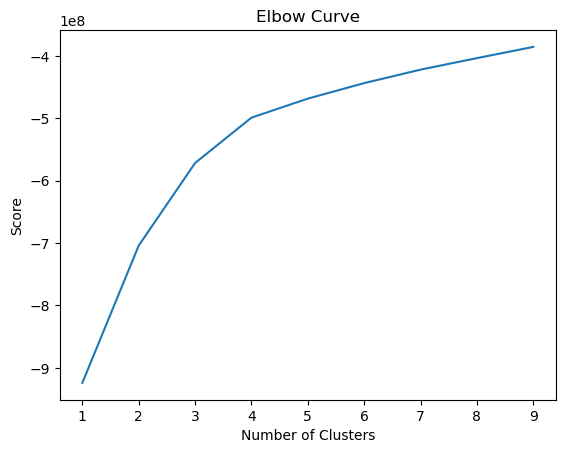

In [41]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### In the graph, there's a large jump from one to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for our clusters is four.

# 04. k-Means Clustering

In [42]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [43]:
# Fit the k-means object to the data
kmeans.fit(subset)

/Users/tyrasmussen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [46]:
subset['clusters'] = kmeans.fit_predict(subset)

/Users/tyrasmussen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
subset.head()

,Winner_avg_KD,Loser_avg_KD,Winner_avg_opp_KD,Loser_avg_opp_KD,Winner_avg_SIG_STR_pct,Loser_avg_SIG_STR_pct,Loser_avg_opp_SIG_STR_pct,Winner_avg_TD_pct,Loser_avg_TD_pct,Winner_avg_opp_TD_pct,Loser_avg_opp_TD_pct,Winner_avg_SUB_ATT,Loser_avg_SUB_ATT,Winner_avg_opp_SUB_ATT,Loser_avg_opp_SUB_ATT,Winner_avg_REV,Loser_avg_REV,Winner_avg_opp_REV,Loser_avg_opp_REV,Winner_avg_SIG_STR_att,Loser_avg_SIG_STR_att,Winner_avg_SIG_STR_landed,Loser_avg_SIG_STR_landed,Winner_avg_opp_SIG_STR_att,Loser_avg_opp_SIG_STR_att,Winner_avg_opp_SIG_STR_landed,Loser_avg_opp_SIG_STR_landed,Winner_avg_TOTAL_STR_att,Loser_avg_TOTAL_STR_att,Winner_avg_TOTAL_STR_landed,Loser_avg_TOTAL_STR_landed,Winner_avg_opp_TOTAL_STR_att,Loser_avg_opp_TOTAL_STR_att,Winner_avg_opp_TOTAL_STR_landed,Loser_avg_opp_TOTAL_STR_landed,Winner_avg_TD_att,Loser_avg_TD_att,Winner_avg_TD_landed,Loser_avg_TD_landed,Winner_avg_opp_TD_att,Loser_avg_opp_TD_att,Winner_avg_opp_TD_landed,Loser_avg_opp_TD_landed,Winner_avg_HEAD_att,Loser_avg_HEAD_att,Winner_avg_HEAD_landed,Loser_avg_HEAD_landed,Winner_avg_opp_HEAD_att,Loser_avg_opp_HEAD_att,Winner_avg_opp_HEAD_landed,Loser_avg_opp_HEAD_landed,Winner_avg_BODY_att,Loser_avg_BODY_att,Winner_avg_BODY_landed,Loser_avg_BODY_landed,Winner_avg_opp_BODY_att,Loser_avg_opp_BODY_att,Winner_avg_opp_BODY_landed,Loser_avg_opp_BODY_landed,Winner_avg_LEG_att,Loser_avg_LEG_att,Winner_avg_LEG_landed,Loser_avg_LEG_landed,Winner_avg_opp_LEG_att,Loser_avg_opp_LEG_att,Winner_avg_opp_LEG_landed,Loser_avg_opp_LEG_landed,Winner_avg_DISTANCE_att,Loser_avg_DISTANCE_att,Winner_avg_DISTANCE_landed,Loser_avg_DISTANCE_landed,Winner_avg_opp_DISTANCE_att,Loser_avg_opp_DISTANCE_att,Winner_avg_opp_DISTANCE_landed,Loser_avg_opp_DISTANCE_landed,Winner_avg_CLINCH_att,Loser_avg_CLINCH_att,Winner_avg_CLINCH_landed,Loser_avg_CLINCH_landed,Winner_avg_opp_CLINCH_att,Loser_avg_opp_CLINCH_att,Winner_avg_opp_CLINCH_landed,Loser_avg_opp_CLINCH_landed,Winner_avg_GROUND_att,Loser_avg_GROUND_att,Winner_avg_GROUND_landed,Loser_avg_GROUND_landed,Winner_avg_opp_GROUND_att,Loser_avg_opp_GROUND_att,Winner_avg_opp_GROUND_landed,Loser_avg_opp_GROUND_landed,Winner_avg_CTRL_time(seconds),Loser_avg_CTRL_time(seconds),Winner_avg_opp_CTRL_time(seconds),Loser_avg_opp_CTRL_time(seconds),Winner_total_time_fought(seconds),Loser_total_time_fought(seconds),Winner_total_rounds_fought,Loser_total_rounds_fought,Winner_total_title_bouts,Loser_total_title_bouts,Winner_current_win_streak,Loser_current_win_streak,Winner_current_lose_streak,Loser_current_lose_streak,Winner_longest_win_streak,Loser_longest_win_streak,Winner_wins,Loser_wins,Winner_losses,Loser_losses,Winner_draw,Loser_draw,Winner_win_by_Decision_Majority,Loser_win_by_Decision_Majority,Winner_win_by_Decision_Split,Loser_win_by_Decision_Split,Winner_win_by_Decision_Unanimous,Loser_win_by_Decision_Unanimous,Winner_win_by_KO/TKO,Loser_win_by_KO/TKO,Winner_win_by_Submission,Loser_win_by_Submission,Winner_win_by_TKO_Doctor_Stoppage,Loser_win_by_TKO_Doctor_Stoppage,Winner_Height_cms,Loser_Height_cms,Winner_Reach_cms,Loser_Reach_cms,Winner_Weight_lbs,Loser_Weight_lbs,Winner_age,Loser_age,Winner_KD,Loser_KD,Winner_SUB_ATT,Loser_SUB_ATT,Winner_REV,Loser_REV,clusters
0,1.000000,0.0000,0.0000,0.000000,0.500000,0.420000,0.495000,0.000000,0.330000,0.000000,0.360000,0.000000,0.500000,0.0000,1.00000,0.000000,0.00000,0.00,0.00,34.000000,50.000000,17.000000,20.000000,13.000000,84.000000,6.000000,45.000000,35.000000,76.500000,18.000000,41.000000,16.000000,114.000000,9.000000,64.000000,0.000000,1.500000,0.000000,1.000000,3.000000,9.000000,0.000000,6.500000,32.000000,39.500000,15.000000,11.000000,11.000000,63.000000,5.000000,27.500000,2.000000,7.500000,2.000000,7.000000,2.00000,12.000000,1.000000,9.000000,0.000000,3.000000,0.000000,2.000000,0.000000,9.00000,0.000000,8.500000,33.000000,35.000000,16.000000,12.500000,12.000000,43.500000,6.000000,17.500000,1.00000,10.500000,1.000000,4.500000,1.000000,4.0000,0.000000,3.000000,0.00000,4.500000,0.000000,3.000000,0.000000,36.500000,

In [48]:
subset['clusters'].value_counts()

0    1009
3    1000
1     950
2     686
Name: clusters, dtype: int64

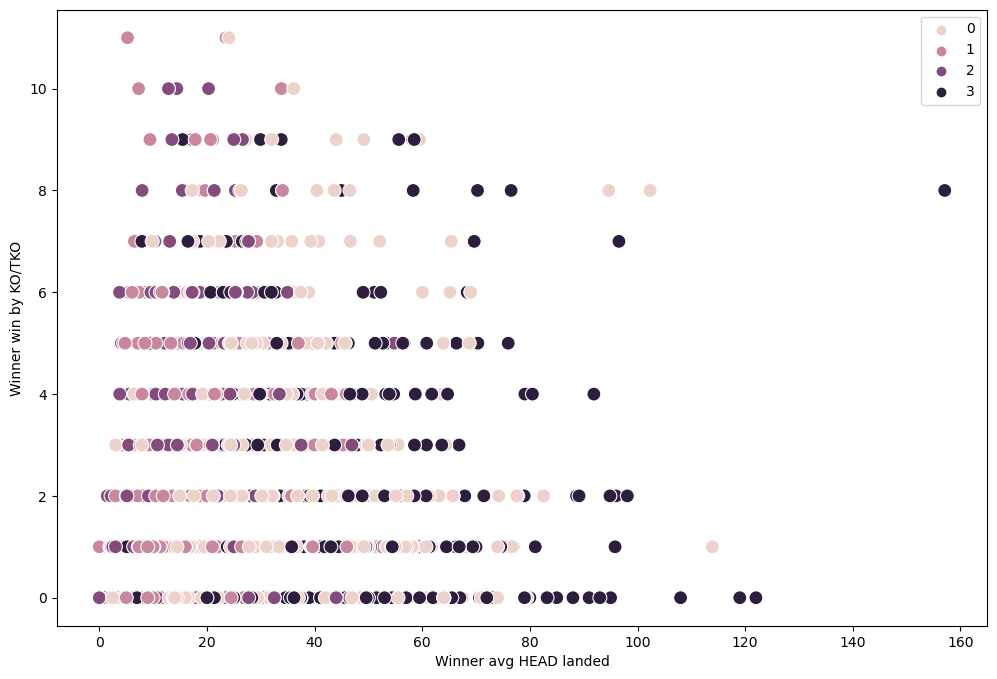

In [52]:
# Plot the clusters for the "Winner_win_by_KO/TKO" and "Winner_avg_HEAD_landed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['Winner_avg_HEAD_landed'], y=subset['Winner_win_by_KO/TKO'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Winner avg HEAD landed') 
plt.ylabel('Winner win by KO/TKO') 
plt.show()

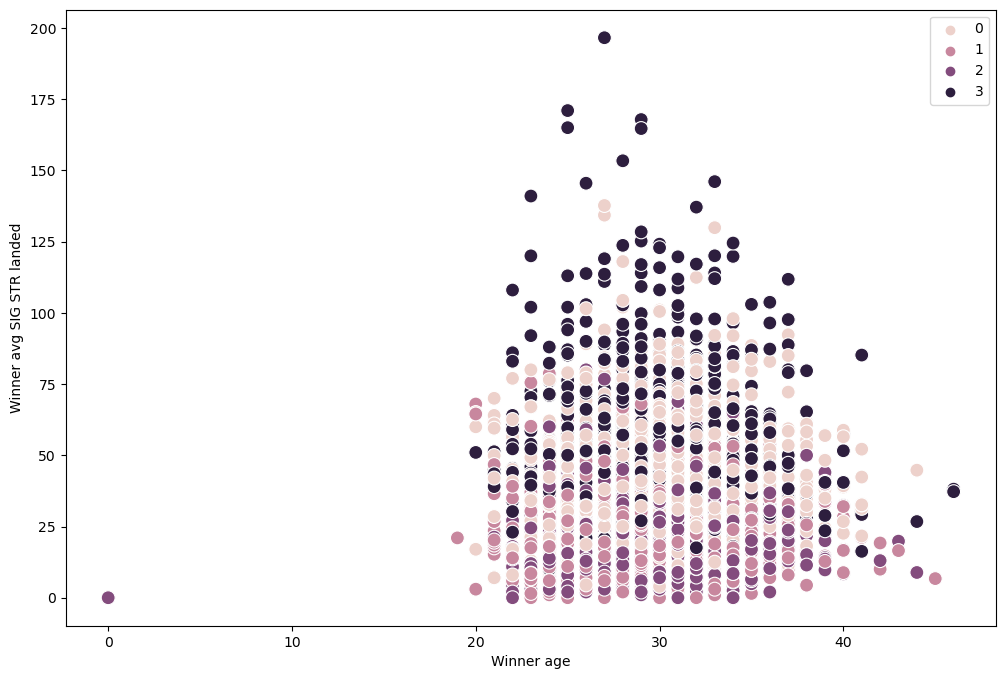

In [53]:
# Plot the clusters for the "Winner_age" and "Winner_avg_HEAD_landed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['Winner_age'], y=subset['Winner_avg_SIG_STR_landed'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Winner age') 
plt.ylabel('Winner avg SIG STR landed') 
plt.show()

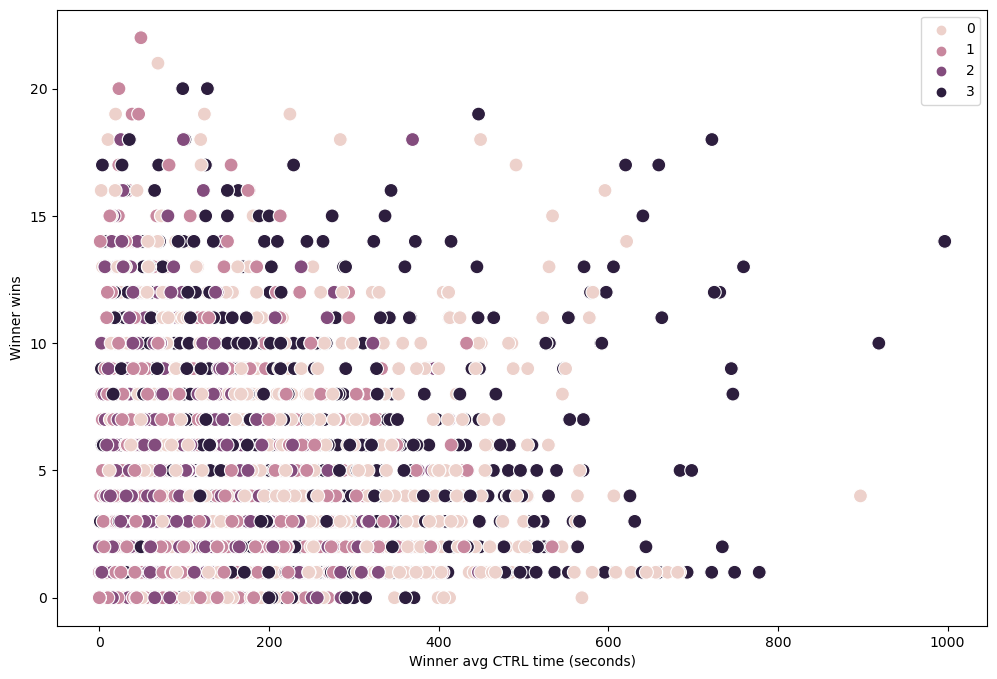

In [54]:
# Plot the clusters for the "Winner_avg_CTRL_time(seconds)" and "Winner_wins" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['Winner_avg_CTRL_time(seconds)'], y=subset['Winner_wins'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Winner avg CTRL time (seconds)') 
plt.ylabel('Winner wins') 
plt.show()

## Results

## The variables chosen do seem to make sense for the clusters in the similarities between variables. For instance; as the 'Winner_avg_CTRL_time' increases past 400 in the graph above, there are mostly points from groups 3 & 0. Also, for the "Winner_age" and "Winner_avg_HEAD_landed" graph, groups 2 & 1 mainly take up the data points below 25 on the y-axis. We can also see these groupings acting similarly in the first graph, where groups 3 & 0 take up all the data points past 60 on the x-axis.

# 05. Group-By Descriptive Statistics

In [55]:
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'

In [56]:
df.groupby('cluster').agg({'Winner_avg_HEAD_landed' : ['mean', 'median'], 'Winner_win_by_KO/TKO':['mean', 'median'], 'Winner_age':['mean', 'median'], 'Winner_avg_SIG_STR_landed':['mean', 'median'], 'Winner_avg_CTRL_time(seconds)':['mean', 'median'], 'Winner_wins':['mean', 'median']})


Winner_avg_HEAD_landed           Winner_win_by_KO/TKO         \
                              mean    median                 mean median   
cluster                                                                    
dark purple              15.278729  13.71875             1.852770    1.0   
light pink               33.148101  29.00000             1.316000    1.0   
pink                     28.075008  25.50000             1.496531    1.0   
purple                   16.463603  14.93750             1.662105    1.0   

            Winner_age        Winner_avg_SIG_STR_landed             \
                  mean median                      mean     median   
cluster                                                              
dark purple  29.260933   30.0                 22.987249  21.919706   
light pink   29.543000   29.0                 52.176241  48.000000   
pink         29.844400   30.0                 43.600398  41.000000   
purple       29.404211   29.0                 24.967136  23.282227   

            Winner_avg_CTRL_time(seconds)             Winner_wins         
                                     mean      median        mean median  
cluster                                                                   
dark purple                     88.464333   65.125000    4.145773    3.0  
light pink                     200.530487  161.303345    4.882000    4.0  
pink                           191.848538  161.316406    4.709613    4.0  
purple                         107.198519   78.729214    4.162105    3.0

## Results

## The mean of 'Winner_avg_HEAD_landed' is significantly higher in the pink and light pink clusters, while also having a higher mean of 'Winner_avg_CTRL_time(seconds). Also, all of the four clusters have a very similar mean of 'Winner_age'  & 'Winner_wins'. 

# For future analysis, we should focus on differences between the Winner & Loser stats leading up to the figth to try and create a model that can accurately predict the winner of the fight.